<a href="https://colab.research.google.com/github/PGLavergne/NYTCrosswordPredicter/blob/main/Part%20I/nytCrossword.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/PGLavergne/NYTCrosswordPredicter/main/nytcrosswords.csv'
dataSet = pd.read_csv(url, encoding='latin-1')
dataSet


,Date,Word,Clue
0,10/31/2021,PAT,"Action done while saying ""Good dog"""
1,10/31/2021,RASCALS,Mischief-makers
2,10/31/2021,PEN,It might click for a writer
3,10/31/2021,SEP,Fall mo.
4,10/31/2021,ECO,Kind to Mother Nature
...,...,...,...
781568,11/21/1993,NAT,Actor Pendleton
781569,11/21/1993,SHRED,Bit
781570,11/21/1993,NEA,Teachers' org.
781571,11/21/1993,BEG,Petition


As you can see, this is a rather large dataset that I've had to constrict to only the first 10000 rows for certain types of analysis.

In [3]:
dataSet.head()

,Date,Word,Clue
0,10/31/2021,PAT,"Action done while saying ""Good dog"""
1,10/31/2021,RASCALS,Mischief-makers
2,10/31/2021,PEN,It might click for a writer
3,10/31/2021,SEP,Fall mo.
4,10/31/2021,ECO,Kind to Mother Nature


This shows the first five entries of what this csv file looks like. The word and clue features were primarily my focus within this dataset, however, the date column became useful when I realized that the null values would interfere with the model.

In [4]:
import matplotlib.pyplot as plt

numeric_values = pd.to_numeric(dataSet['Word'], errors='coerce')
null_entries = dataSet.isnull().sum()
null_entries

Date     0
Word    34
Clue     0
dtype: int64

In [5]:
null_word_entries = dataSet[dataSet['Word'].isnull()]
null_word_entries

,Date,Word,Clue
24006,12/24/2020,NaN,Zero
43275,4/17/2020,NaN,Empty
67323,6/7/2019,NaN,Of no value
93805,6/24/2018,NaN,No longer in force
141809,10/1/2016,NaN,"{ }, in mathematics"
157990,3/3/2016,NaN,Having no legal force
176711,7/2/2015,NaN,Invalid
189051,1/22/2015,NaN,Empty
195559,10/29/2014,NaN,Void
229912,8/7/2013,NaN,"Empty, as a math set"


This code is preparing, building, and training a neural network for a text classification task using the New York Times Crossword dataset. It starts by loading the 'Clue' as features and 'Word' as the target variable from a DataFrame. Rows with missing values in these columns are dropped. The text data in the 'Clue' column is then tokenized using the Keras Tokenizer and padded to ensure uniform length. The target variable is one-hot encoded. The dataset is split into training and testing sets. The neural network model is constructed, consisting of an embedding layer, a flatten layer, and two dense layers. The model is compiled with the Adam optimizer and categorical crossentropy loss. It is then trained on the training set, and the training history is captured. Finally, the code generates a plot displaying the training and validation loss over the epochs to visualize the model's performance during training. The goal is to predict the correct 'Word' based on the textual context provided by the 'Clue' in the New York Times crossword dataset.

As this is only really training a dataset to match a 'word' based on a 'clue', I assumed that because each input **must** match a desired output, the accuracy would remain low. And this model is also not accounting for token length, which must be constrained to a certain limit for each clue and the word it represents. Because if you've ever played a crossword, you'll know that the size of the word is just as important as the word it's adjacent to.

Epoch 1/50
200/200 [==============================] - 4s 16ms/step - loss: 8.8998 - accuracy: 1.5625e-04 - val_loss: 8.9248 - val_accuracy: 0.0000e+00
Epoch 2/50
200/200 [==============================] - 3s 13ms/step - loss: 8.8093 - accuracy: 0.0011 - val_loss: 9.0548 - val_accuracy: 6.2500e-04
Epoch 3/50
200/200 [==============================] - 2s 12ms/step - loss: 8.5168 - accuracy: 0.0027 - val_loss: 9.5918 - val_accuracy: 0.0000e+00
Epoch 4/50
200/200 [==============================] - 2s 12ms/step - loss: 7.5566 - accuracy: 0.0109 - val_loss: 11.2314 - val_accuracy: 0.0000e+00
Epoch 5/50
200/200 [==============================] - 2s 12ms/step - loss: 6.3875 - accuracy: 0.0511 - val_loss: 12.8297 - val_accuracy: 0.0012
Epoch 6/50
200/200 [==============================] - 3s 15ms/step - loss: 5.3672 - accuracy: 0.1289 - val_loss: 14.5845 - val_accuracy: 0.0019
Epoch 7/50
200/200 [==============================] - 3s 13ms/step - loss: 4.5661 - accuracy: 0.2050 - val_loss: 16.168

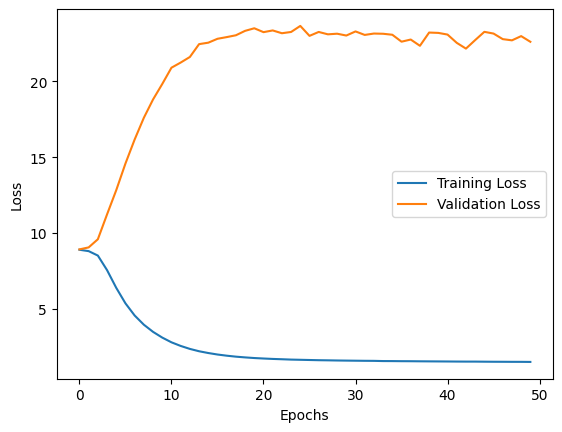

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Assuming 'Word' is the target variable and 'Clue' is the feature
dataSet_partial = pd.read_csv(url, encoding='latin-1', nrows=10000)
X = dataSet_partial['Clue']
y = dataSet_partial['Word']

# Drop rows with missing values
nyt = dataSet.dropna(subset=['Clue', 'Word'])

# Convert text data to numerical features using Tokenizer
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequence = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequence)

# Convert target variable to categorical
y_categorical = pd.get_dummies(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=X_padded.shape[1]))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


I've altered the test size by 10 percent for each graph to test the model. I just wanted to see how the model adjusted to evaluate it's performance on unseen data.

Epoch 1/50
175/175 [==============================] - 5s 27ms/step - loss: 8.8960 - accuracy: 3.5714e-04 - val_loss: 8.9176 - val_accuracy: 0.0000e+00
Epoch 2/50
175/175 [==============================] - 6s 36ms/step - loss: 8.7891 - accuracy: 8.9286e-04 - val_loss: 9.0755 - val_accuracy: 7.1429e-04
Epoch 3/50
175/175 [==============================] - 6s 37ms/step - loss: 8.3502 - accuracy: 0.0027 - val_loss: 9.7951 - val_accuracy: 7.1429e-04
Epoch 4/50
175/175 [==============================] - 5s 31ms/step - loss: 7.2114 - accuracy: 0.0136 - val_loss: 11.5481 - val_accuracy: 7.1429e-04
Epoch 5/50
175/175 [==============================] - 5s 30ms/step - loss: 6.0919 - accuracy: 0.0593 - val_loss: 13.3053 - val_accuracy: 7.1429e-04
Epoch 6/50
175/175 [==============================] - 7s 38ms/step - loss: 5.2205 - accuracy: 0.1229 - val_loss: 14.7407 - val_accuracy: 0.0014
Epoch 7/50
175/175 [==============================] - 7s 40ms/step - loss: 4.5518 - accuracy: 0.1852 - val_loss

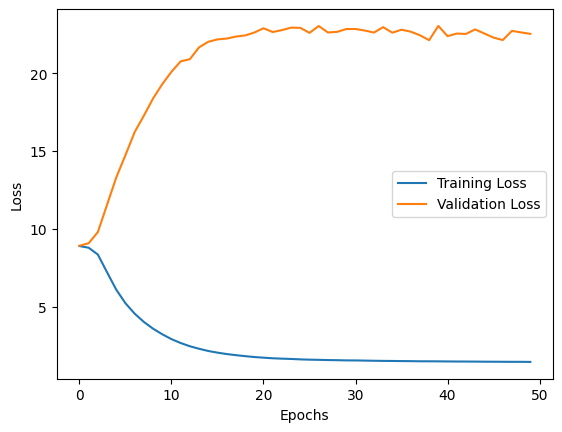

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Assuming 'Word' is the target variable and 'Clue' is the feature
X = dataSet_partial['Clue']
y = dataSet_partial['Word']

# Drop rows with missing values
nyt = dataSet_partial.dropna(subset=['Clue', 'Word'])

# Convert text data to numerical features using Tokenizer
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequence = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequence)

# Convert target variable to categorical
y_categorical = pd.get_dummies(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.3, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=X_padded.shape[1]))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This last analysis used 40 percent of the dataset as a test set and 60 percent as a training set. Considering the idea that this model doesn't really account for the a few of the variables that I will need to include in later parts of this project (ie. token size, adjacenct token matching) I wanted to understand if the model could learn without the entirety of the dataset that I originally wanted to use.

It's (almost) clear that the validation loss suffers less with a larger test size, but in future parts of this project, I will explore the limits of what I can use in the dataset and also how to effectively adjust the amount of epochs I should use to have a better accuracy.

Epoch 1/50
150/150 [==============================] - 6s 35ms/step - loss: 8.8948 - accuracy: 4.1667e-04 - val_loss: 8.9086 - val_accuracy: 0.0000e+00
Epoch 2/50
150/150 [==============================] - 7s 44ms/step - loss: 8.7645 - accuracy: 6.2500e-04 - val_loss: 9.1587 - val_accuracy: 0.0017
Epoch 3/50
150/150 [==============================] - 4s 28ms/step - loss: 8.5012 - accuracy: 0.0025 - val_loss: 9.5458 - val_accuracy: 0.0017
Epoch 4/50
150/150 [==============================] - 4s 25ms/step - loss: 7.9282 - accuracy: 0.0037 - val_loss: 10.4908 - val_accuracy: 8.3333e-04
Epoch 5/50
150/150 [==============================] - 5s 34ms/step - loss: 6.8907 - accuracy: 0.0158 - val_loss: 11.9452 - val_accuracy: 8.3333e-04
Epoch 6/50
150/150 [==============================] - 6s 37ms/step - loss: 5.9330 - accuracy: 0.0592 - val_loss: 13.7626 - val_accuracy: 8.3333e-04
Epoch 7/50
150/150 [==============================] - 4s 28ms/step - loss: 5.1488 - accuracy: 0.1242 - val_loss: 14

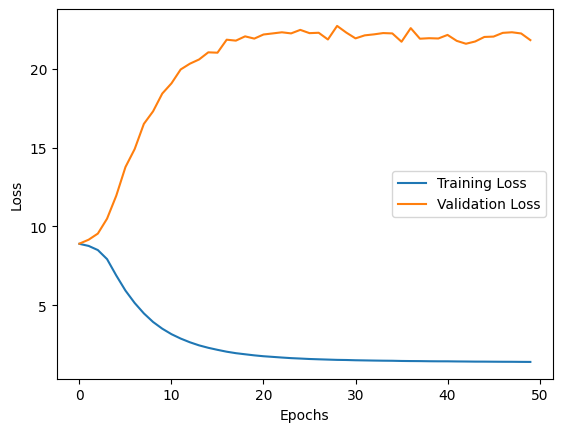

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Assuming 'Word' is the target variable and 'Clue' is the feature
X = dataSet_partial['Clue']
y = dataSet_partial['Word']

# Drop rows with missing values
nyt = dataSet_partial.dropna(subset=['Clue', 'Word'])

# Convert text data to numerical features using Tokenizer
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequence = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequence)

# Convert target variable to categorical
y_categorical = pd.get_dummies(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.4, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=X_padded.shape[1]))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()